## Gradient Boost Regression

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [73]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [74]:
X[:5]

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136]])

In [75]:
y[:5]

array([ 0.0515729 ,  0.59447979,  0.16605161, -0.07017796,  0.34398593])

In [76]:
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y
df.head()   

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


Text(0.5, 1.0, 'X vs Y')

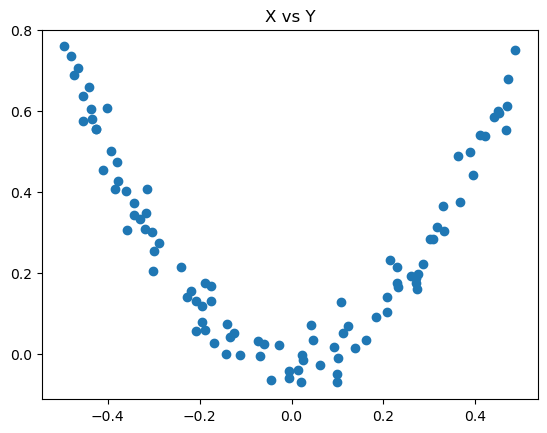

In [77]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

##### Model 1 --> Mean

In [78]:
df['pred1'] = df['y'].mean()

In [79]:
df.head()

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


In [80]:
df['res1'] = df['y'] - df['pred1']

In [81]:
df.head()

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


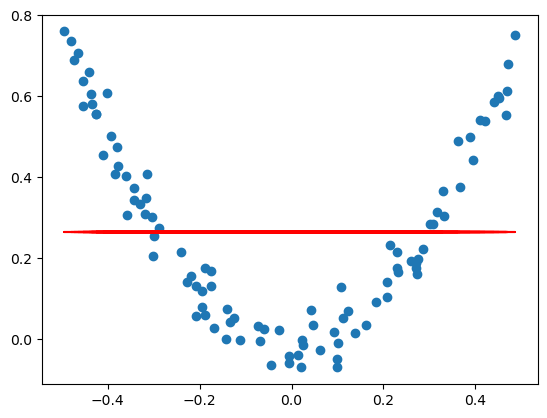

In [82]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

##### Model2 --> Decision Tree

In [83]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8) # max depth of the tree can be between 8 to 32
tree1.fit(X,df['res1'])

DecisionTreeRegressor(max_leaf_nodes=8)

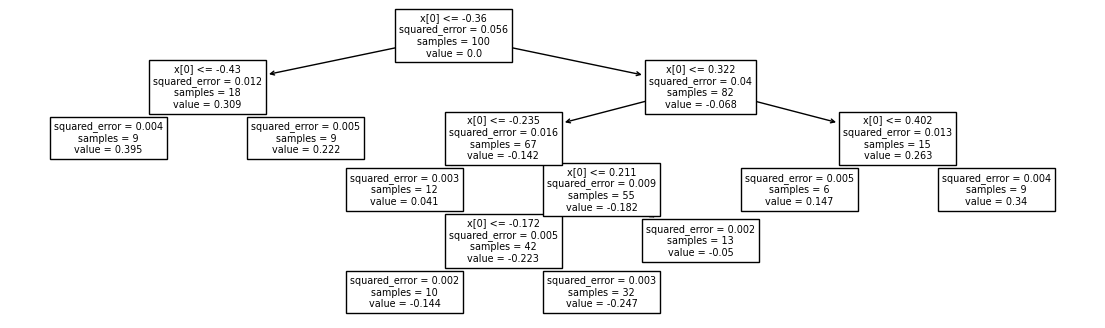

In [84]:
plt.figure(figsize=(14,4))
plot_tree(tree1)
plt.show()

In [85]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)
X_test[:5]

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397])

In [86]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

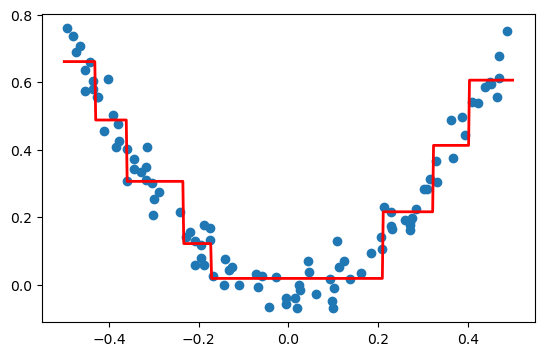

In [87]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [88]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1)) # M1+lr*M2

In [89]:
df.head()

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964


In [90]:
df['res2'] = df['y'] - df['pred2']

In [91]:
df.head()

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022


##### Model3 --> Decision Tree

In [92]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8) # max depth of the tree can be between 8 to 32
tree2.fit(X,df['res2'])

DecisionTreeRegressor(max_leaf_nodes=8)

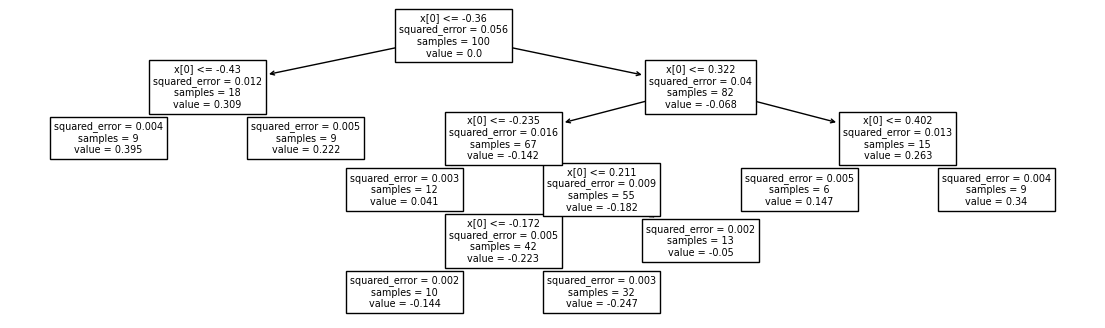

In [93]:
plt.figure(figsize=(14,4))
plot_tree(tree1)
plt.show()

In [94]:
X_test = np.linspace(-0.5, 0.5, 500)
X_test[:5]

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397])

In [95]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

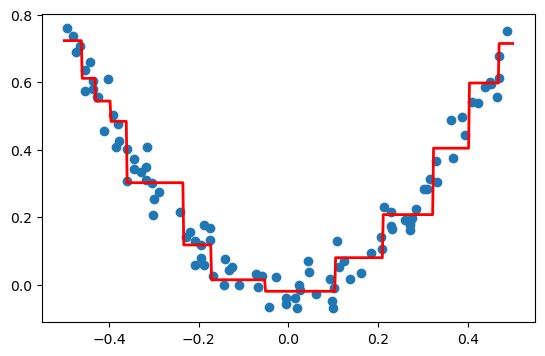

In [96]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

## Gradient Boost Classification

In [10]:
import pandas as pd
import numpy as np
import random
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame([[6.82, 118, 0],
                    [6.36, 125, 1],
                    [5.39, 99, 1],
                    [5.50, 106, 1],
                    [6.39, 148, 0],
                    [9.13, 148, 1],
                    [7.17, 147, 1],
                    [7.72, 72, 0]], columns = ['cgpa',	'iq',	'is_placed']
)
df

,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


##### Model 1 ---> log of odds

In [3]:
# log of odds
df['pre1(log-odds)'] = np.log(5/3)
df

,cgpa,iq,is_placed,pre1(log-odds)
0,6.82,118,0,0.510826
1,6.36,125,1,0.510826
2,5.39,99,1,0.510826
3,5.50,106,1,0.510826
4,6.39,148,0,0.510826
5,9.13,148,1,0.510826
6,7.17,147,1,0.510826
7,7.72,72,0,0.510826


In [4]:
# probability
df['pre1(probability)'] = 1/(1+np.exp(-np.log(5/3)))
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability)
0,6.82,118,0,0.510826,0.625
1,6.36,125,1,0.510826,0.625
2,5.39,99,1,0.510826,0.625
3,5.50,106,1,0.510826,0.625
4,6.39,148,0,0.510826,0.625
5,9.13,148,1,0.510826,0.625
6,7.17,147,1,0.510826,0.625
7,7.72,72,0,0.510826,0.625


In [5]:
# calculating residual for stage 1
df['res1'] = df['is_placed'] - df['pre1(probability)']
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.625,-0.625


##### Model 2 ---> Decision Tree

In [7]:
df.iloc[:,0:2] # X 

,cgpa,iq
0,6.82,118
1,6.36,125
2,5.39,99
3,5.50,106
4,6.39,148
5,9.13,148
6,7.17,147
7,7.72,72


In [8]:
df.iloc[:,-1] # y

0   -0.625
1    0.375
2    0.375
3    0.375
4   -0.625
5    0.375
6    0.375
7   -0.625
Name: res1, dtype: float64

In [9]:
reg1 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)
reg1.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

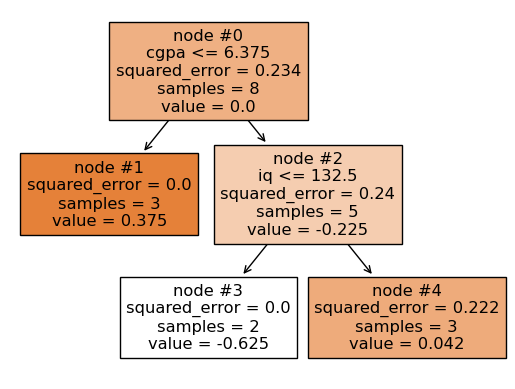

In [11]:
plot_tree(reg1, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()

In [13]:
# tells about the leaf nodes
df['leaf_entry1'] = reg1.apply(df.iloc[:,0:2])
df

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1
0,6.82,118,0,0.510826,0.625,-0.625,3
1,6.36,125,1,0.510826,0.625,0.375,1
2,5.39,99,1,0.510826,0.625,0.375,1
3,5.50,106,1,0.510826,0.625,0.375,1
4,6.39,148,0,0.510826,0.625,-0.625,4
5,9.13,148,1,0.510826,0.625,0.375,4
6,7.17,147,1,0.510826,0.625,0.375,4
7,7.72,72,0,0.510826,0.625,-0.625,3


In [19]:
temp_df = df[df['leaf_entry1'] == 3]
temp_df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174


In [20]:
def return_logs(leaf):
  temp_df = df[df['leaf_entry1'] == leaf]
  num = temp_df['res1'].sum()
  den = sum(temp_df['pre1(probability)'] * (1 - temp_df['pre1(probability)']))
  return round(num/den,2)

df['pre2(log-odds)'] = df['pre1(log-odds)'] + df['leaf_entry1'].apply(return_logs)
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174


In [21]:
df['pre2(probability)'] = 1/(1+np.exp(-df['pre2(log-odds)']))
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477


In [22]:
df['res2'] = df['is_placed'] - df['pre2(probability)']
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477


##### Model 3 ---> Decision Tree

In [23]:
reg2 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)
reg2.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

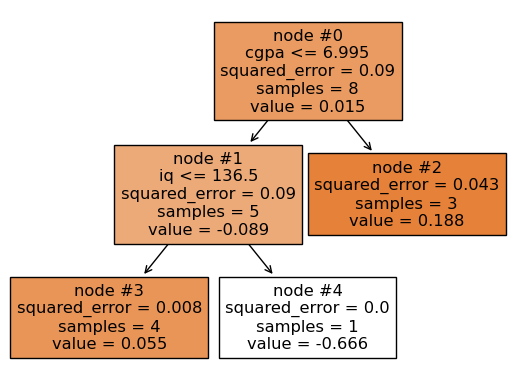

In [24]:
plot_tree(reg2, feature_names=['cgpa','iq'],filled=True, node_ids=True)
plt.show()

In [25]:
df['leaf_entry2'] = reg2.apply(df.iloc[:,0:2])
df

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2


In [27]:
def return_logs(leaf):
  num = df[df['leaf_entry2'] == leaf]['res2'].sum()
  den = sum(df[df['leaf_entry2'] == leaf]['pre2(probability)'] * (1 - df[df['leaf_entry2'] == leaf]['pre2(probability)']))
  return round(num/den,2)

df['pre3(log-odds)'] = df['pre1(log-odds)'] + df['pre2(log-odds)'] + df['leaf_entry2'].apply(return_logs)

In [28]:
df['pre3(probability)'] = 1/(1+np.exp(-df['pre3(log-odds)']))
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(probability),res1,leaf_entry1,pre2(log-odds),pre2(probability),res2,leaf_entry2,pre3(log-odds),pre3(probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-1.068349,0.255717
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4,-1.798349,0.142052
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2,-0.598349,0.354722


In [29]:
df['res_final'] = df['is_placed'] - df['pre3(probability)']

In [30]:
df[['res1','res2','res_final']]

,res1,res2,res_final
0,-0.625,-0.103477,-0.255717
1,0.375,0.108049,0.039104
2,0.375,0.108049,0.039104
3,0.375,0.108049,0.039104
4,-0.625,-0.666151,-0.142052
5,0.375,0.333849,0.095207
6,0.375,0.333849,0.095207
7,-0.625,-0.103477,-0.354722
